In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Converting the image to black and white:

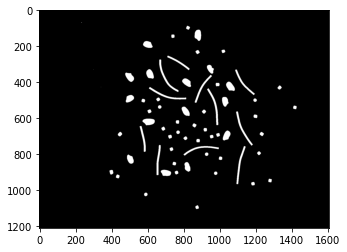

In [3]:
image = cv2.imread('OriginalImage.tif') 

(thresh, blackAndWhiteImage) = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

plt.imshow(blackAndWhiteImage, cmap='gray')

#cv2.imwrite("BWimage.png", blackAndWhiteImage)

Erosion to detect pasta (15):

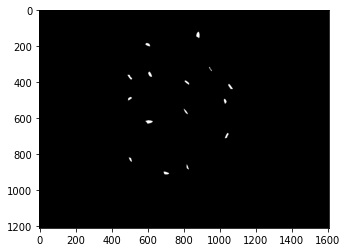

In [4]:
kernel = np.ones((18, 18), np.uint8)
 
img_erosion = cv2.erode(blackAndWhiteImage, kernel, iterations=1)

plt.imshow(img_erosion, cmap='gray')

Erosion to detect grains (39):

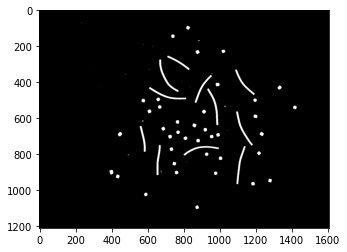

In [15]:
kernel = np.ones((25, 25), np.uint8)
kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(15,15))
kernel2 = cv2.getStructuringElement(cv2.MORPH_CROSS,(15,15))

#First we substract the pasta image to get rid of it and 

img_again = cv2.dilate(img_erosion, kernel)
 
sub = cv2.subtract(blackAndWhiteImage,img_again)

plt.imshow(sub, cmap='gray')

Now we work with the substracted image, where only spaguetti and grains appear:

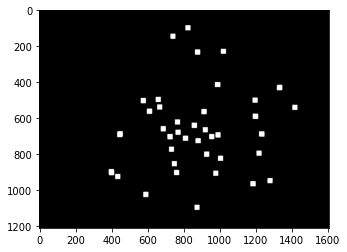

In [16]:
kernel3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(15,15)) #Important els kernels en funcio de la imagee

new = cv2.erode(sub,kernel3)
new = cv2.dilate(new, kernel)

plt.imshow(new,cmap="gray")

Erosion to detect spaguetti (11):

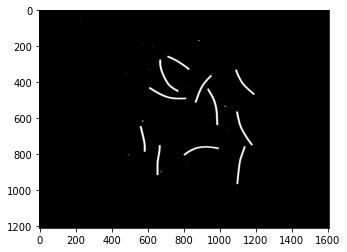

In [17]:
final = cv2.subtract(sub,new)
plt.imshow(final,cmap="gray")

Second practise

In [9]:

ret,thresh = cv2.threshold(gray,127,255,1)
contours,h = cv2.findContours(thresh,1,2)
for cnt in contours:
    cv2.drawContours(image,[cnt],0,(0,0,255),1)

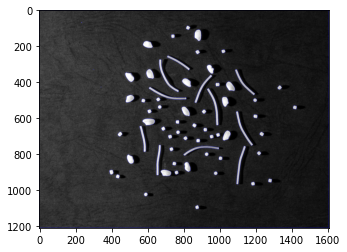

In [10]:
plt.imshow(image, cmap='gray')

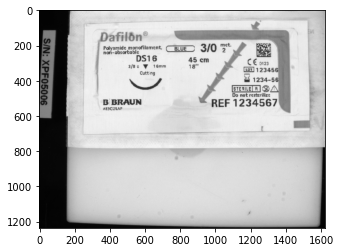

In [4]:
image2 = cv2.imread('n.bmp')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

#We are allowed to use mask, cut the number and use correlation with another image with the number

threshold to avoid problems with the background
Pattern 
detection with blood detector
correlation to find similarity between objects